# Árboles de decisión

### Julián D. Arias Londoño

Profesor Asociado  
Departamento de Ingeniería de Sistemas  
Universidad de Antioquia, Medellín, Colombia  
julian.ariasl@udea.edu.co

### Intuición

Los modelos vistos en la clase anterior (GMM) nos permitieron evidenciar que algunos problemas de clasificación imponen retos adicionales en el diseño y ajuste de los modelos predictivos, debido a que no siempre podemos asumir que las muestras de una misma clase están agrupadas en el espacio de características, sino que por el contrario puede formar diferentes conglomerados (clusters). 

Ese tipo de situaciones se pueden presentar tanto en problemas de clasificación como en problemas de regresión. Veamos el siguiente conjunto de muestras

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

In [3]:
a1 = np.array([1, 2, 3])
a2 = np.array([-5, 263])
x1 = np.linspace(-10,10,100);
x2 = np.linspace(10.1,30.1,100);
y1 = np.zeros(100)
y2 = np.zeros(100)

for i in range(len(x1)):
    b1 = np.array([x1[i],x1[i]**2,1])
    b2 = np.array([x2[i],1])
    y1[i] = sum(a1*b1 +  30*(np.random.rand() - 0.5))
    y2[i] = sum(a2*b2 +  30*(np.random.rand() - 0.5))
    
x = hstack([x1,x2])
y = hstack([y1,y2])


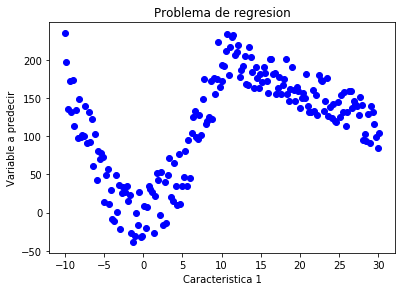

In [4]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.plot(x, y, '.b',markersize=12)
axes.set_xlabel('Caracteristica 1')
axes.set_ylabel('Variable a predecir')
axes.set_title('Problema de regresion');

¿Qué modelo podríamos ajustar a este conjunto de datos de tal manera que se aproxime a la estructura observada?

Es claro que podrías seleccionar un modelo complejo y flexible que pudiera adaptarse a los datos observados. Sin embargo, observando la gráfica nos damos cuenta que los datos tienen un comportamiento parabólico para las muestras que tienen un valor inferior a 10 en la característica 1, y un comportamiento lineal en las muestras que tienen un valor superior a 10 en la característica 1. Podríamos entonces construir un modelo predictivo para las muestras que tienen un valor inferior a 10 en la característica 1 y otro modelo diferente para las muestras restantes. En el momento de hacer una predicción, verificaríamos si la nueva muestra tiene un valor inferior a 10 en la característica 1 y de acuerdo con ello eligiríamos el modelo a usar para hacer la predicción.

Los árboles de decisión utilizan una lógica similar a la descrita en el párrafo anterior, pero incluso mucho más simple. Su principio de funcionamiento es subdividir las muestras en el espacio de características, hasta lograr grupos con comportamientos similares a partir de los cuales se puedan hacer predicciones usando operadores como la moda (en problemas de clasificación) o la media (en problemas de regresión).

### Definición

El aprendizaje de árboles de decisión es un método para la predicción de variables a partir de funciones discretas, en los cuales la función aprendida es representada a través de un árbol de decisión. Son en general métodos de aprendizaje inductivo muy empleados, pueden representarse en forma de conjuntos de reglas <b>if-then</b> y han sido aplicados con éxito en el desarrollo de sistemas de apoyo al diagnóstico médico, riesgo de crédito y solicitud de préstamos, entre otros.

Una particularidad de los árboles de decisión es que no utilizan todo el conjunto de características en cada nivel, sino que por el contrario utilizan diferentes características en cada nivel decisión.

![alt text](./Images/Arbol.png "Árbol de decisión")

<li>Los círculos representan los nodos internos, que son variables y umbrales.</li>
<li> Los cuadros representan las hojas o nodos terminales y determinan la clase o el valor de salida que asignará el modelo a las muestras que se ubiquen en dicho nodo.</li>
<li>El nodo superior es la raíz del árbol.</li>

Existen diferentes métodos de aprendizade de árboles de decisión, algunos de ellos pueden ser empleados tanto en problemas de regresión como en problemas de clasificación. El algoritmo básico para el aprendizaje de árboles de decisión es conocido como ID3 y fue propuesto por Ross Quinlan en 1986. El algoritmo ID3 construye la estructura del árbol de arriba hacia abajo y utiliza en cada decisión una sola variable. Dicho algoritmo fue evolucionando y posteriormente se publicaron las versiones C4.5 y C5.0, que incluyeron modificaciones en la selección de los umbrales a evaluar. Sin embargo, los principios de funcionamiento general continuaron siendo los mismos.

Para comprender el método de entrenamiento que implementa ID3, debemos comenzar respondiendo la pregunta de cómo determinar cuál atributo (variable) debería ser evaluado en el nodo raíz.

<b>Nota</b>: Es necesario aclarar que la evaluación realizada en cada nodo podría involucrar a más de una característica. Cuando se usa una sola característica, el método se conoce como monoteísta, mientras que cuando involucra a dos o más propiedades se conoce como politeísta. Los árboles de decisión más ampliamente usados utilizan una sola características en cada nodo interno, ya que permite una formulación mucho más simple del algoritmo de entrenamiento.

---------------------------------------------------------------------------------------------------------------------------------

Para poder determinar cual atributo usar y el valor del umbral, en cada uno de los nodos internos, es necesario definir una medida que cuantifique la calidad de la partición. Dicha medida será diferente si el propósito es resolver un problema de clasificación o un problema de regresión. Abordaremos primero la formulación para problemas de clasificación. En este caso el nodo ideal sería uno en el que sólo hubiesen muestras de una misma clase (un nodo puro), una de las medidas más usadas es precisamente una que trata de medir la <b>impureza</b> de un nodo. 

### Medida de impureza

La medida clásica de impureza de una partición $U$ está basada en la medida de entropía. La entropía es en realidad un funcional, es decir una función que toma como argumento otra función. En este caso particular, la entropía es una medida estimada sobre una función de distribución de masa $P$:

$$I(U) = - \sum_j P(w_j)\log_2 P(w_j)$$

Esta medida será cero si todas las muestras de la partición pertenecen a una misma clase (nodo puro) y será máxima si existe un número igual de muestras de cada clase en la participación (máxima incertidumbre). El valor máximo de impureza incrementa con el número de clases, pero eso no es un inconveniente porque dicha medida se usa de manera comparativa para establecer el mejor de un grupo de umbrales.

Existen algunas formas alternativas de medición (pero que comparten el mismo principio), una de dichas formas se conoce como la impureza de Gini:

$$I(U) =  \sum_{i \neq j} P(w_i)P(w_j)$$

Teniendo en cuenta la medida anterior, se puede definir una medida de calidad de partición proporcionada por un atributo conocida como <b>Ganancia de Información</b>. La ganacia de información es la reducción esperada en la impureza de información debida a la partición del conjunto de muestras de acuerdo a un atributo.

En otras palabras, la Ganancia de información $Gain(U,a)$ es la reducción esperada en la entropía del conjunto $U$ causada por el conocimiento del atributo $a$.

Para estimar la ganancia de información se define una variable y un umbral sobre dicha variable y se evalúa la reducción de la impureza debida a la partición como:

$$Gain(U,a) = I(U)  - (I(U_L)P_L + I(U_R)P_R)$$

donde $U_L$ corresponde al subconjunto asignado al nodo hijo izquierdo y $U_R$ el subconjunto asignado al nodo hijo derecho. $P_L$ y $P_R$ corresponden a las probabilidades de cada nodo hijo de acuerdo al conjunto de entrenamiento.


#### Algoritmo básico

Teniendo en cuenta que las variables que ingresan al sistema pueden ser continuas o discretas, es necesario evaluar la impureza en la partición de cada variable, definiendo una malla de valores. La malla de valores puede construirse a partir del conjunto de entrenamiento, definiendo únicamente umbrales relacionados a los valores que toman las muestras para la variable bajo análisis, en lugar de definir incrementos arbitrarios que pueden evaluar de manera pobre regiones más densas, mientras que consumen mucho tiempo evaluando varios umbrales en regiones con muy pocos datos.

Una vez se ha determinado la variable y el umbral que proporcionan mayor ganancia de información, se realiza la partición, se crean los dos nodos hijos y se dividen las muestras de acuerdo a la condición establecida. Para cada uno de los nuevos nodos hijos se realiza el mismo procedimiento de manera recursiva.

En el algoritmo de aprendizaje básico se realiza partición de las muestras hasta alcanzar impureza igual a 0. Sin embargo esto puede conducir a problemas de sobre ajuste (cada nodo conteniendo una o muy pocas muestras de entrenamiento).

Una forma alternativa es definir un límite deceado de impureza y permitir que el árbol crezca hasta alcanzar un nivel de impureza inferior al deseado, o particionar un nodo siempre y cuando la reducción en la impureza sea mayor a un valor preestablecido. Sin embargo, muchas aproximaciones permiten que el árbol crezca hasta alcanzar una impureza de cero y posteriormente se aplica un procedimiento de podado.


#### Podado

Existen un sinnúmero de algoritmos para reducir el número de nodos y evitar el sobre ajuste del modelo. Uno de los más básicos es llamado podado de error reducido.

En éste todos los nodos de decisión son candidatos a ser reducidos y reemplazados por nodos terminales. La clase asignada en el nuevo nodo es la clase a la cual pertenezcan la mayoría de las muestras asociadas al nodo.

Un nodo de decisión es suprimido únicamente si el árbol podado tiene el mismo o mejor desempeño que el árbol original sobre un conjunto de validación. El podado se realiza sobre un nodo a la vez y se realiza hasta que no pueda ser eliminado ningún nodo sin perjudicar el desempeño del sistema.


In [5]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data[:,1:3], iris.target)

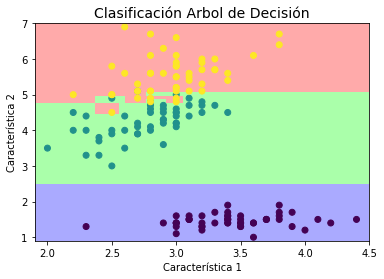

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA',])
X = iris.data
y = iris.target
x_min, x_max = X[:, 1].min() - .1, X[:, 1].max() + .1
y_min, y_max = X[:, 2].min() - .1, X[:, 2].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

Z = np.zeros((100,100))

#Evaluando las fdp's en una malla de valores
for i in range(100):
    for j in range(100):
        #print([xx[1,i],yy[j,1]])
        Z[i,j]=clf.predict(np.array([xx[1,i],yy[j,1]]).reshape(1,2))
plt.figure()
plt.title(u'Clasificación Arbol de Decisión', fontsize=14)
plt.xlabel(u'Característica 1')
plt.ylabel(u'Característica 2')
plt.pcolormesh(xx, yy, Z.T, cmap=cmap_light)
plt.scatter(X[:,1], X[:,2], c=y);


In [14]:
import graphviz
import collections
import pydotplus
from IPython.display import Image 

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(iris.data, iris.target)

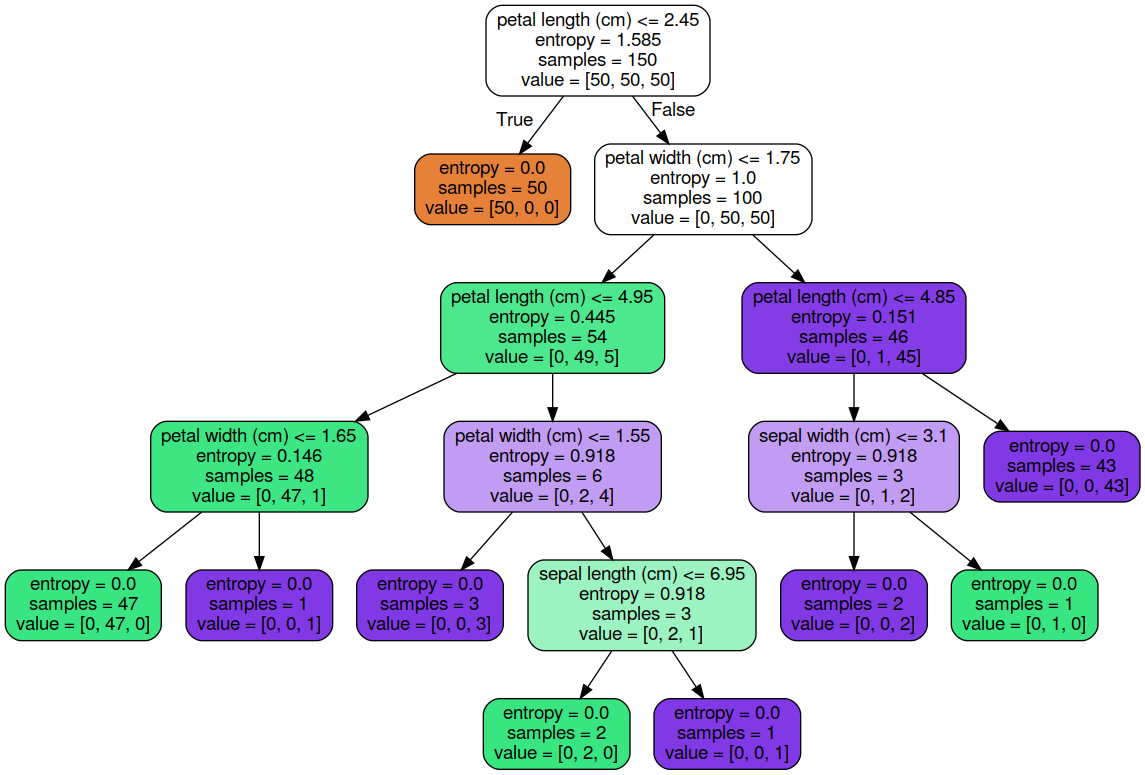

In [15]:
# Visualize data
dot_data = tree.export_graphviz(clf,
                                feature_names=iris.feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Árbol de regressión

Una idea similar a la descrita hasta ahora para problemas de clasificación, se puede usar para problemas de regresión. En este caso es necesario clarificar cómo tomar la decisión sobre el valor de predicción y cómo decidir una partición. Recordemos que en problemas de regresión, una de las medidas fundamentales de la calidad del sistema es aquella que mide la diferencia entre el valor real y valor predicho por el sistema:

$$R = \frac{1}{N}\sum_{i=1}^N (y_i - \hat y_i)^2$$

En este caso $y_i$ es el valor real y $\hat y_i$ es el valor estimado por el sistema para una muestra ${\bf{x}}_i$. En el caso de los árboles de decisión cada nodo terminal tiene asignado un valor $\hat y_i$ que se calcula como:

$$ \hat y_i = \hat y(\tau_l)= \frac{1}{N(\tau_l)} \sum_{{\bf{x}}_i \in \tau_l} y_i$$

donde $\tau_l$ representa un nodo terminal y $N(\tau_l)$ es el número de muestras en dicho nodo. En otras palabras $\hat y_i$ es el promedio de los $\{y_i\}$'s de todas las muestras asignadas al nodo $\tau_l$. 

Teniendo en cuenta la medida anterior, el error de predicción del árbol se puede estimar como:

$$R = \frac{1}{N} \sum_{l=1}^L \sum_{{\bf{x}}_i \in \tau_l} (y_i - \hat y(\tau_l))^2$$

Por consiguiente, durante el entrenamiento del modelo, la partición en un nodo $\tau$ será aquella que provea la mayor reducción en el valor de $R$. La reducción en $R(\tau)$ debida a la partición en $\tau_l$ y $\tau_R$ está dada por:

$$\Delta R(\tau) = R(\tau) - R(\tau_L) - R(\tau_R)$$

El podado de este tipo de árboles se realiza de la misma manera en la que se describió el caso anterior, haciendo los cambios respectivos.

Automatically created module for IPython interactive environment


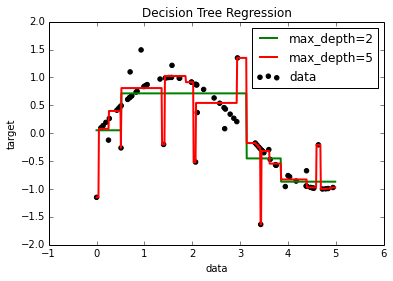

In [3]:
print(__doc__)

import numpy as np

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
from sklearn.tree import DecisionTreeRegressor

clf_1 = DecisionTreeRegressor(max_depth=2)
clf_2 = DecisionTreeRegressor(max_depth=5)
clf_1.fit(X, y)
clf_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = clf_1.predict(X_test)
y_2 = clf_2.predict(X_test)

# Plot the resu  et")
pl.title("Decision Tree Regression")
pl.legend()
pl.show()

### Comité de Máquinas 

Es usual en el aprendizaje de máquina no dejar la responsabilidad de la decisión a un solo modelo, sino por el contrario combinar la decisión de varios modelos para tomar una decisión final. Existen muchas maneras de combinar clasificadores, una de ellas es conocida como <b>Bagging</b> "Bootstrap Agreggating", la cual consiste en realizar $B$ muestreos (con substitución) a partir del conjunto de entrenamiento y entrenar un clasificador diferente a partir de cada uno de los conjuntos de muestras.

La decisión final se toma dependiendo de si el problema es de clasificación o de regresión, si el problema es de clasificación se utiliza la regla del mayor voto (moda) y si por el contrario el problema es de regresión se usa el promedio de las predicción de cada clasificador. Este tipo de aproximaciones permiten reducir la varianza en el error obtenido por el modelo predictivo.

### Random Forest

En el caso particular de los árboles de regresión o clasificación, existe una modificación del método anterior conocida como Random Forest, la cual consiste no sólo en crear un grupo de árboles (bosque) $B$, sino también en incluir un componente aleatorio en la partición que se realiza en cada nodo. 

En un Random Forest el conjunto de variables que se evalúan en cada nodo se escoge de manera aleatoria del conjunto de variables originales, es decir, antes de analizar cuál variable usar para hacer la partición, se escogen de manera aleatorioa $m$ variables y la escogencia de la partición se realiza únicamente usando dicho subconjunto.

Al igual que en bagging, la decisión final se toma a partir de la combinación de las decisiones de los $B$ árboles entrenados.

Existe una variante adicional conocida como Árboles Extremadamente Aleatorios. <b>Consultar</b> en qué consiste.

### Múltiples salidas

Hasta ahora hemos visto diferentes métodos y modelos basados en aprendizaje de máquina para la solución de problemas en los cuales sólo existe una variable a predecir. Sin embargo, como discutimos en sesiones pasadas, nos podemos encontrar con problemas en los cuales existen un conjunto de $K$ variables a predecir, en lugar de una sola. Si las variables a predecir son independientes entre ellas, lo que podemos hacer es entrenar $K$ modelos independientes para cada variable; por el contrario, si las variables a predecir están interrelacionadas entre ellas, puede ser de utilidad construir un modelo que haga la predicción de manera simultánea y adicionalmente que durante el entrenamiento utilice la información de todas las variables.

Los árboles de decisión pueden ser extendidos de manera sencilla para que puedan ser utilizados en problemas de múltiples salidas. Simplemente es necesario construir una función criterio para la partición que tenga en cuenta todas las variables al mismo tiempo. Para problemas de clasificación se puede usar una medida de ganancia de información total, correspondiente a la suma de la ganancia de información por cada variable, o el máximo entre las ganacias de información individuales.

El problemas de regresión se puede usar una variante de la distancia de Mahalanobis dada por:

$$R = \frac{1}{N} \sum_{l=1}^L \sum_{{\bf{x}}_i \in \tau_l} (y_i - \hat y(\tau_l))^T \Sigma(\tau_l)^{-1} (y_i - \hat y(\tau_l))$$

A continuación veremos un ejemplo de un problema de múltiples salidas:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Automatically created module for IPython interactive environment


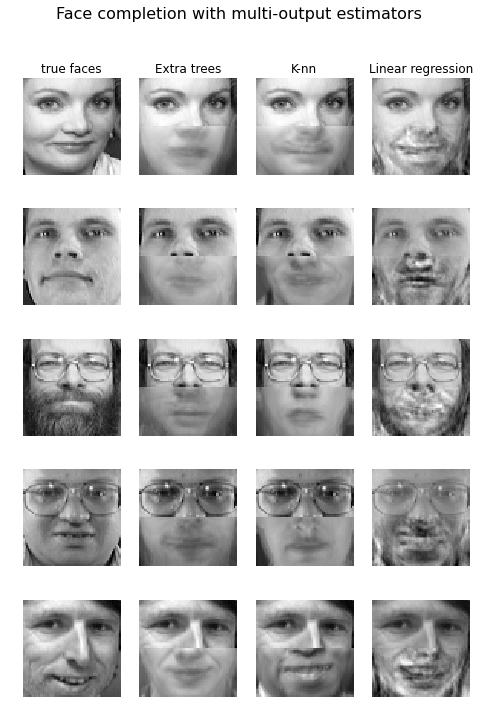

In [32]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import RidgeCV

# Load the faces datasets
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
X_train = train[:, :np.ceil(0.5 * n_pixels)]  # Upper half of the faces
y_train = train[:, np.floor(0.5 * n_pixels):]  # Lower half of the faces
X_test = test[:, :np.ceil(0.5 * n_pixels)]
y_test = test[:, np.floor(0.5 * n_pixels):]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    #"Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")


    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()


#### Bibliografía